# Estimación De Riqueza De Especies (Richness)

## Oscar Julian Layton

El objetivo del análisis de estos datos (Crawley (2007, página 534)) es explicar las diferencias entre las parcelas con respecto a la riqueza de las especies usando las siguientes variables explicativas:

* **(x2):** las diferencias en su biomasa 
* **nivel de pH de su suelo:**, el cual pertenece a una de **tres categorias** posibles: bajo (x3 = 0 y x4 = 0), medio (x3 = 1 y x4 = 0), y alto (x3 = 0 y x4 = 1). 

Aquí la variable de respuesta está tederminada por:

* **y:(La riqueza de las especies):** se cuantifica mediante un recuento del número de especies de plantas en cada parcela. 

In [4]:
#rm(list=ls())
getwd()
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")  #Asignando capeta busqueda por default
source("macros.txt")           # Llamar el archivo de macros que esta en la carpeta especifica,
                               # macros son una fuciines especificas creadas porel profesor

[1] "C:/Users/YULY/Desktop/Desktop/UNAL 2018/MLGz/MLG Vanegas"

La lectura de los datos se realiza por medio de la siguiente linea:

In [5]:
#################### Lectura de los datos ####################
rickness<-read.table("rickness.txt", header=TRUE, dec=",")
str(rickness)                                                #ordena los factores alfanumericamente por eso hight, low, mid

'data.frame':	90 obs. of  3 variables:
 $ pH     : Factor w/ 3 levels "high","low","mid": 1 1 1 1 1 1 1 1 1 1 ...
 $ Biomass: num  0.469 1.731 2.09 3.926 4.367 ...
 $ Species: int  30 39 44 35 25 29 23 18 19 12 ...


 ### Organizando los niveles de la variable categórica

In [40]:
rickness2<-within(rickness,{pH <-factor(pH, levels=c("low","mid","high"))}) #organizando los nievles de ph en bajo medio, alto
# rickness$pH <- factor(rickness$pH, levels(rickness$pH)[c(2,3,1)])    #otra forma de ordenar niveles
head(rickness,n=10)

pH,Biomass,Species
high,0.4692972,30
high,1.7308704,39
high,2.0897785,44
high,3.9257871,35
high,4.3667927,25
high,5.4819747,29
high,6.6846859,23
high,7.5116506,18
high,8.1322025,19
high,9.5721286,12


### Gráfica

A continuación se muestra la gráfica que representa al número de especies de plantas versus la biomasa en parcelas con pH bajo,
medio y alto.

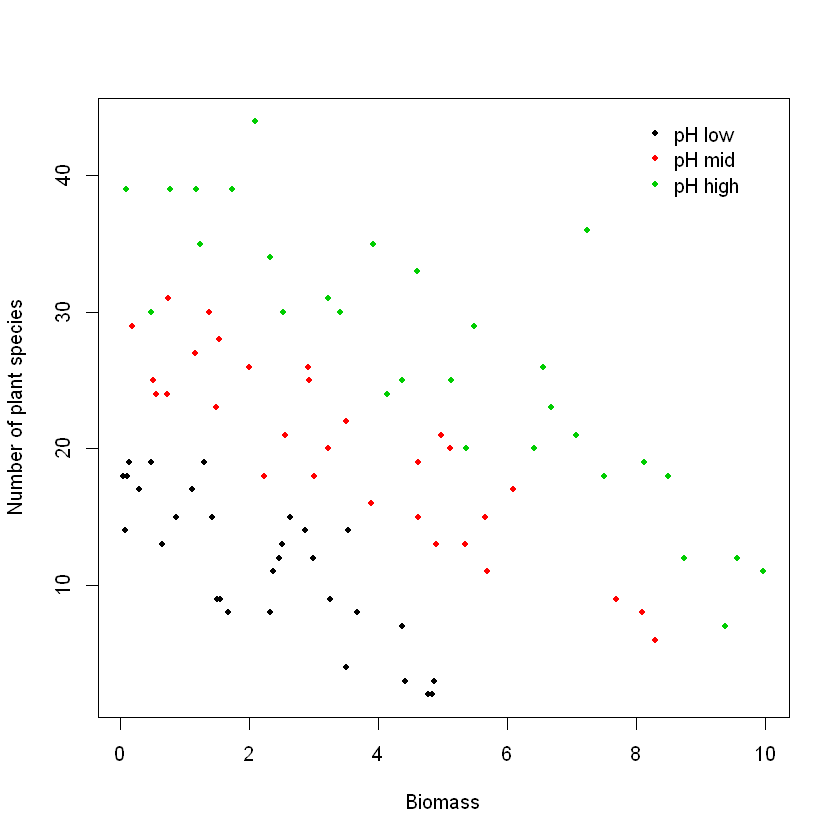

In [7]:
#################### Gráfico de los datos ####################
with(rickness2,{
plot(Biomass,Species,col=as.numeric(pH),pch=20,xlab="Biomass",
     ylab="Number of plant species")
legend(8,45,legend=c("pH low","pH mid","pH high"),
     col=sort(unique(as.numeric(pH))),pch=20,bty="n")})

El gáfico de los datos indica que el número de especies de plantas en las parcelas disminuye linealmente a medida que aumenta la biomasa, y la velocidad a la que se produce esa disminución no depende del nivel de pH del suelo, lo cual sugiere que debe usarse un modelo de rectas paralelas, es decir, un modelo cuya componente sistemática incluye los efectos de biomasa y nivel de pH pero no la interacción entre ellos.



A pesar de lo evidenciado por el gráfico de los datos el modelo propuesto para analizarlos supone que el efecto de la biomasa sobre el número esperado de especies de plantas depende del nivel de pH del suelo, es decir, los datos se analizan suponiendo que $y_1, . . . , y_90$ son realizaciones de las variables aleatorias $Y_1, . . . , Y_90$, las cuales son tales que

$\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta  \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma^2)
	       \end{array}
	     \right.
   \end{equation*}
   $$
  
  $\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k2} + \beta_3 x_{k3} + \beta_4 x_{k4} + \beta_5 x_{k2}x_{k3} + \beta_6 x_{k2}x_{k4}  \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma^2)
	       \end{array}
	     \right.
   \end{equation*}
   $$


### Ajuste del Modelo

In [8]:
#################### Ajuste del modelo ####################
fit <- lm(Species ~ 1 + Biomass + pH + Biomass*pH, data=rickness2)   #lm modelo lineal, este modelo no tiene interaccion,  tiene dos efectos (Biomass , pH)
summary(fit)                                             #la codificacion estÃ¡ en la estimacion de los parametros de la variable dummy, (se estÃ¡n estimando 4 betas)
                                                         #en summary aparece la estad?stica F la cual dice que todos los btas son iguals a cero menos el intercepto   vz  h1:alguna beta es diferente de cero




Call:
lm(formula = Species ~ 1 + Biomass + pH + Biomass * pH, data = rickness2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.290 -2.554 -0.124  2.208 15.677 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    17.84740    1.22510  14.568  < 2e-16 ***
Biomass        -2.82778    0.45357  -6.235 1.74e-08 ***
pHmid          11.18359    1.76813   6.325 1.17e-08 ***
pHhigh         22.75667    1.83564  12.397  < 2e-16 ***
Biomass:pHmid   0.26268    0.54557   0.481    0.631    
Biomass:pHhigh  0.02733    0.51248   0.053    0.958    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.818 on 84 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.8444 
F-statistic: 97.58 on 5 and 84 DF,  p-value: < 2.2e-16


Analizando el modelo mediante la función **lm:modelo lineal**, las interacciones no son significativas esto puede ser visto en la gráfica puesto que daba indicios de paralelismo. Tal paralelismo o interacción de los datos se evaluan considerando el siguiente sistema de hipótesis:

$$H_{0}: \beta_5=\beta_6 =0\;\;\;\;vs \;\;\;\; H_{1}: \beta_5 \neq \beta_6 \neq 0$$


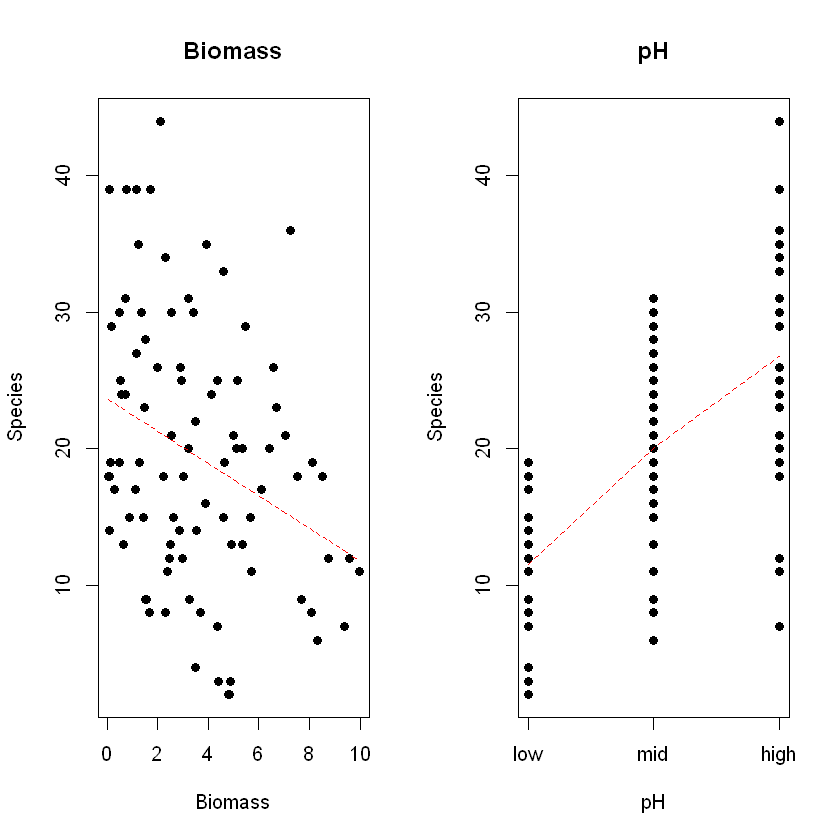

In [9]:
graphs_glm(fit,1,2,pch=16)   #hace graficos marginales, con 1,2 establezco el grafico 

## Contraste de hipótesis de interacción


In [37]:
fit2 <- lm(Species ~1+ Biomass + pH, data = rickness2)
anova_glm(fit2,fit)    #H_o  :  b_5=b_6=0   se concluye que no hay interaccion, las rectas son paralelas, las rectas
                        #tienen la misma pendianete.  
                        #comparando la SCres, OBSERVANDO LA SALIDA RESIDUAL STANDAR ERROR ES SQRT(SIGMA{2)


 F test 

 Model 1:  Species ~ 1 + Biomass + pH + Biomass * pH 
 Model 2:  Species ~ 1 + Biomass + pH 

     F    Df1 Df2 Pr(>F)
  0.21465   2  84 0.8073


El resultado anterior generado por **anova_glm(fit2,fit)** está determinado al particionar ${\beta}=\mathbf{\beta}=(\beta_1 , \beta_2)$ donde **s=2** es la dimensión del vector $\beta_1$:

$$F=\frac{Q(\mathbf{\widehat{\beta}}^{(0)})-Q(\mathbf{\widehat{\beta}})}{s \widehat{\sigma}^2}\;\;\;\;\;\; ; \;\;\;\;\;\;\;F \sim F_{(1-\alpha)}(s,n-p)$$

$$F=\frac{(3.783^2)*86 - (3.818^2)*84}{(2 )(3.818^2)}= 0.2152688$$

Aquí: 
* #2 es la dimension del vector de hipotesisi nula
* $Q(\mathbf{\widehat{\beta}}^{(0)})= (\widehat{\sigma}^2)* gl $ es: **scres  del modelo sin interacción**
* $Q(\mathbf{\widehat{\beta}})= (\widehat{\sigma}^2)* gl  $ es:  **scres del modelo con interacción (se sabe que sigma es mas pequeño)**

* pv=1-pf(0.2152688,2,84)= 0.8067681

Estos resultados indican que no existe evidencia estadísticamente significativa para rechazar $H_0$, por lo que se puede concluir que no existe interacción entre los efectos de la biomasa y el nivel de pH del suelo, lo cual confirma lo evidenciado por el gráfico de los datos. Por lo tanto, el modelo seleccionado para analizar los datos es el siguiente: 

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k2} + \beta_3 x_{k3} + \beta_4 x_{k4} \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma^2)
	       \end{array}
	     \right.
   \end{equation*}
   $$


In [11]:
step_glm(fit, criterion="BIC", direction = "backward")   #forward  o  backward


Initial model:
Species ~ 1 + Biomass + pH + Biomass:pH 

Step 0 :    
             Df      BIC      AIC   R-squared*   PRESS+     CP**  p-value
- Biomass:pH  2   513.3235 500.8244     0.8472  15.0122   2.4293   0.8073
<none>            521.8643 504.3656     0.8444  15.4643   6.0000         

Step 1 :  - Biomass:pH 
          Df      BIC      AIC   R-squared*   PRESS+     CP**  p-value
<none>         513.3235 500.8244     0.8472  15.0122   2.4293         
- Biomass  1   632.1231 622.1238     0.4057  57.6001 248.2567   0.0000
- pH       2   666.9625 659.4631     0.0903  86.5861 428.4049   0.0000

*  Adjusted R-squared
+  Allen's PRESS divided by the sample size
** Mallows's CP


Final model:
Species ~ 1 + Biomass + pH 



El anterior codigo establece el mejor modelo. Si usamos el proceso backward, se tiene: 

* **paso 0**: Si quito la interacción tendría un BIC=513.3235 mucho menor que el bic de no hacer nada. luego es aconsejable quitar la interacción doble. Con el AIC me da la misma conclusión. Con el R^2 (Entre mayor + mejor ) tambien indica que es bueno quirtar la interaccion doble.  Con el R^2 basado en la estadística Pearson también (entre mayor mejor). Según el p-valor se establece que hay que sacar esa interacción.   **CONCLUSIÓN: Sacar la interacción doble**.

* **paso 1**: se tienen dos efectos los cuales contrastandose con el BIC, AIC se es necesario *no hacer nada*, no obstante en el $R^2_d$ da la misma conclusión.

Luego el modelo ideal está determinado por:

$$Species = 1 + Biomass + pH$$

In [12]:
summary(fit2)


Call:
lm(formula = Species ~ 1 + Biomass + pH, data = rickness2)

Residuals:
   Min     1Q Median     3Q    Max 
-8.965 -2.693  0.062  2.171 15.508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.6248     0.7890   22.34   <2e-16 ***
Biomass      -2.7276     0.1717  -15.89   <2e-16 ***
pHmid        11.9782     1.0020   11.95   <2e-16 ***
pHhigh       22.6200     1.0818   20.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.783 on 86 degrees of freedom
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8472 
F-statistic: 165.5 on 3 and 86 DF,  p-value: < 2.2e-16


---


In [13]:
coef(fit2)                                    #beta gorros
coef(fit2)[2]                                 #segundo beta gorros
vcov(fit2)                                    #sigma(xÂ´x)^-1  estimacion de la matriz de varianzas y con estimada  p*p
diag(vcov(fit2))
sqrt(diag(vcov(fit2)))                        #
head(fitted(fit2))                                  #mu gorros
head(residuals(fit2))
x<-model.matrix(fit2) ; head(x)          #matrix x
nrow(x)
ncol(x)

(Intercept)     Biomass       pHmid      pHhigh 
   17.62484    -2.72758    11.97819    22.62002

Biomass 
-2.72758

,(Intercept),Biomass,pHmid,pHhigh
(Intercept),0.6224985,-0.06545830,-0.39203851,-0.29983955
Biomass,-0.0654583,0.02947137,-0.03830197,-0.07981281
pHmid,-0.3920385,-0.03830197,1.00399910,0.58083768
pHhigh,-0.2998396,-0.07981281,0.58083768,1.17036547


(Intercept)     Biomass       pHmid      pHhigh 
 0.62249850  0.02947137  1.00399910  1.17036547

(Intercept)     Biomass       pHmid      pHhigh 
  0.7889857   0.1716723   1.0019976   1.0818343

1        2        3        4        5        6 
38.96482 35.52378 34.54483 29.53697 28.33409 25.29234

1         2         3         4         5         6 
-8.964819  3.476222  9.455173  5.463033 -3.334090  3.707658

(Intercept),Biomass,pHmid,pHhigh
1,0.4692972,0,1
1,1.7308704,0,1
1,2.0897785,0,1
1,3.9257871,0,1
1,4.3667927,0,1
1,5.4819747,0,1


[1] 90

[1] 4

## Modelo final

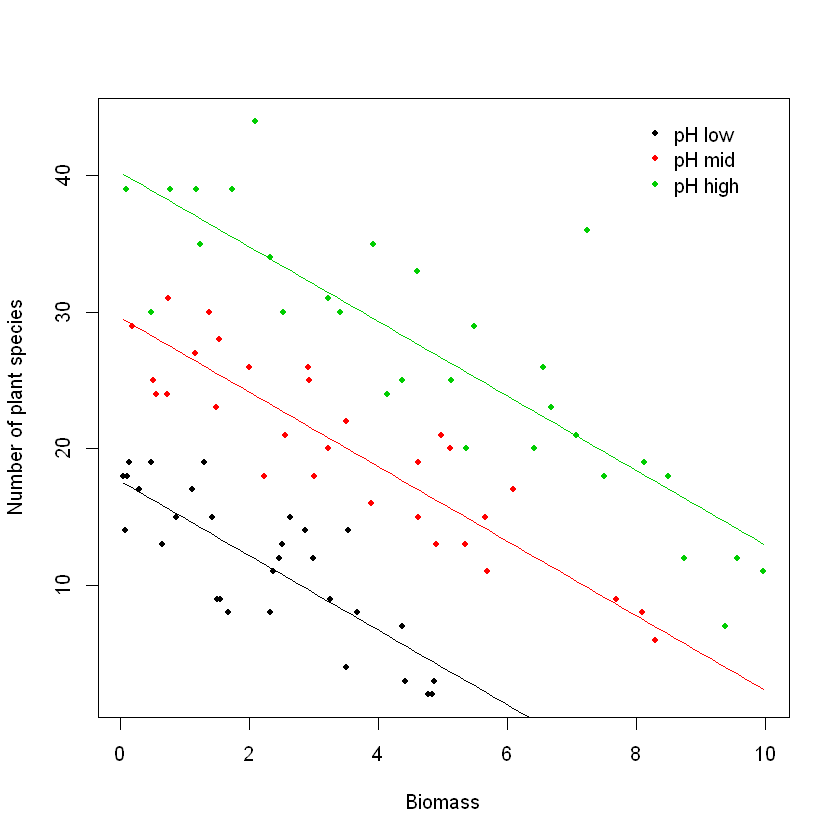

In [14]:
#################### Grafico de los datos junto con el modelo ajustado ####################
with(rickness2,{
Biomass2 <- seq(min(Biomass),max(Biomass),length=100)
ys <- predict(fit2,data.frame(Biomass=Biomass2,pH="high"),type="response")
plot(Biomass2,ys,xlab="Biomass",ylab="Number of plant species",xlim=range(Biomass),
     ylim=range(Species),type="l",col=3)
ys <- predict(fit2,data.frame(Biomass=Biomass2,pH="mid"),type="response")
lines(Biomass2,ys,col=2)
ys <- predict(fit2,data.frame(Biomass=Biomass2,pH="low"),type="response")
lines(Biomass2,ys,col=1)
points(Biomass,Species,col=as.numeric(pH),pch=20,xlab="Biomass",ylab="Number of plant species")
legend(8,45,legend=c("pH low","pH mid","pH high"),col=sort(unique(as.numeric(pH))),pch=20,bty="n")})


In [15]:
summary(fit2)


Call:
lm(formula = Species ~ 1 + Biomass + pH, data = rickness2)

Residuals:
   Min     1Q Median     3Q    Max 
-8.965 -2.693  0.062  2.171 15.508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.6248     0.7890   22.34   <2e-16 ***
Biomass      -2.7276     0.1717  -15.89   <2e-16 ***
pHmid        11.9782     1.0020   11.95   <2e-16 ***
pHhigh       22.6200     1.0818   20.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.783 on 86 degrees of freedom
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8472 
F-statistic: 165.5 on 3 and 86 DF,  p-value: < 2.2e-16


### Interpretación de los parámetros

Para la interpretación de los parámetros se tendrá en cuenta que la base de la variable categórica está determinada por **PHlow: Phbajo**

* El efecto del PH no depende de la biomasa por no existir interacción.

**Interpretación del intercepto ($\beta_1$)**

* Permitiendose pensar en parcelas con biomasa cero, $\beta_1= 17.6248$ representa el numero de especies (plantas) promedio en parcelas con PH bajo.

**Interpretación del efecto de la biomasa ($\beta_2$)**

* Sin importar el nivel de pH en el suelo, el número esperado de especies de plantas en una parcela disminuye, aproximadamente, 2.73 especies por cada unidad que aumenta su biomasa.  (en otras palabras a medida que aumenta la biomasa, el número esperado de especies disminuye en 2.72 aproximadamente por cada unidad adicional en biomasa) *(otra interpretación está caraterizada al comparar dos parcelas con el mismo PH, por cada unidad adicional en la biomasa el numero de especies promedio disminuye  2.73 unidades)*

**Interpretación del efecto del ph ($\beta_3 , \beta_4$)**

* Si se comparan dos parcelas con la misma biomasa pero donde el suelo de la primera de ellas tiene pH medio mientras que el suelo de la segunda tiene pH bajo, entonces el número esperado de especies de plantas en la primera parcela es, aproximadamente, 11.98 especies mayor que en la segunda. 

* si se comparan dos parcelas con la misma biomasa pero donde el suelo de la primera de ellas tiene pH alto mientras que el suelo de la segunda tiene pH bajo, entonces el número esperado de especies de plantas en la primera parcela (la PHalto) es, aproximadamente, 22.62 especies mayor que en la segunda  (la de PHbajo). 

**Interpretación de $\sigma$**

* Distancia promedio entre la diferencia de el número de especies en una parcela particular y el valor promedio de la misma para parcelas con los mismos valores en biomasa y PH.

Por otro lado, el valor del coeficiente de determinación ($R^2 = 0.852$) indica que $85.24 \%$ de las diferencias entre las 90 parcelas de la muestra con respecto a la riqueza de las especies se explica por las diferencias entre las mismas en relación a la biomasa y al nivel de pH en el suelo.

---
## Análisis de sensibilidad



[1] 0.07428925 0.05439606 0.04993413 0.03540655 0.03398467 0.03396242
 [7] 0.03967847 0.04706473 0.05445689 0.07771860 0.08161842 0.06140341
[13] 0.04516548 0.03809855 0.03354972 0.03372922 0.03881477 0.04434743
[19] 0.05964011 0.07432219 0.06904029 0.06233090 0.04729632 0.03932841
[25] 0.03462847 0.03342237 0.03792120 0.04273021 0.06332747 0.08589631
[31] 0.05637108 0.04279753 0.03526935 0.03389103 0.03728248 0.04017306
[37] 0.06929703 0.05145937 0.03815592 0.03409467 0.03352395 0.03771735
[43] 0.04274527 0.07651065 0.04925936 0.04151826 0.03675227 0.03360701
[49] 0.03585105 0.03860609 0.08036455 0.05198126 0.04192301 0.03404077
[55] 0.03333381 0.03581205 0.04308497 0.04695732 0.04936843 0.04482697
[61] 0.04258942 0.04226277 0.03712808 0.03510715 0.03346006 0.03337691
[67] 0.03367631 0.03552286 0.04326454 0.04682446 0.04303714 0.03955464
[73] 0.03839836 0.03424592 0.03395493 0.03420052 0.03350607 0.03668852
[79] 0.03770840 0.04736453 0.04101377 0.04279387 0.03462508 0.03582629
[85] 0.03438045 0.03335598 0.03456883 0.03690532 0.04279333 0.04778653

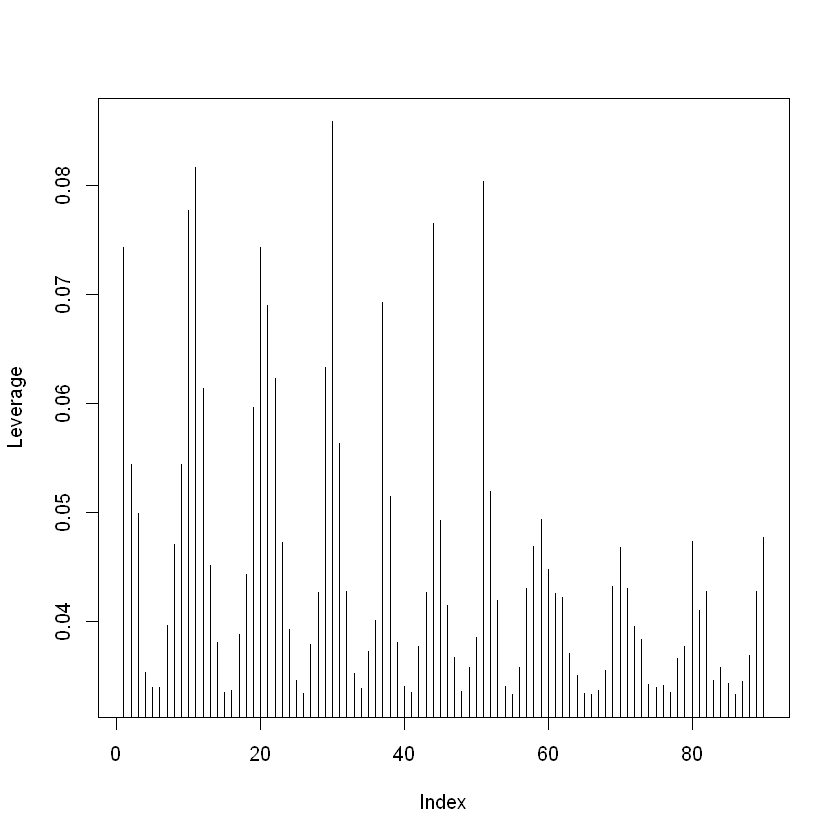

In [16]:
h_kk <- leverage_glm(fit2,out=TRUE);h_kk #out=TRUE genera automaticamente los valores de hkk, la gráfica es en eje y las h_kk 

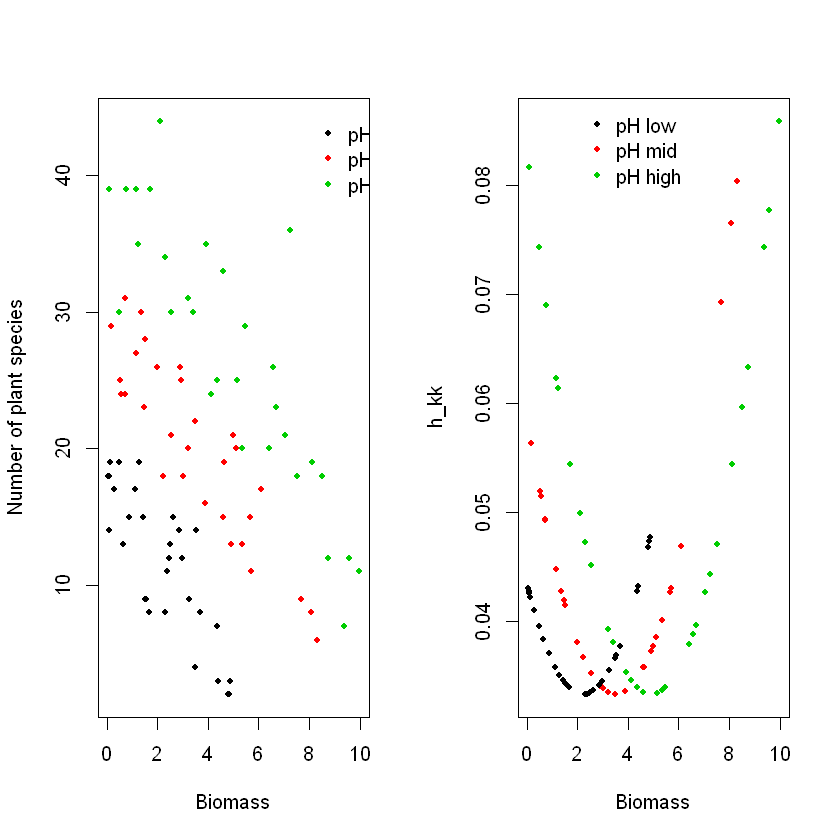

In [17]:
par(mfrow=c(1,2))
with(rickness2,{
plot(Biomass,Species,col=as.numeric(pH),pch=20,xlab="Biomass",
     ylab="Number of plant species")
legend(8,45,legend=c("pH low","pH mid","pH high"),
     col=sort(unique(as.numeric(pH))),pch=20,bty="n")})

with(rickness2,{plot(Biomass,h_kk,col=as.numeric(pH),pch=20,xlab="Biomass",ylab="h_kk")
                legend(2,0.088,legend=c("pH low","pH mid","pH high"),
				col=sort(unique(as.numeric(pH))),pch=20,bty="n")})


* En la primera gráfica los valores con mayor $h_{kk}$ están situados en la mitad de la nuve de puntos (negra observaciones alrededor del 2), (roja observaciones alrededor del 4) y (verde observaciones alrededor del 5)
* En la segunda gráfica en especial la sombreada por verde los valores cercanos a 5 generan mucha información y los lejanos, cercanos al valor de 10 poca información. Lo mismo para la grafica roja y negra.

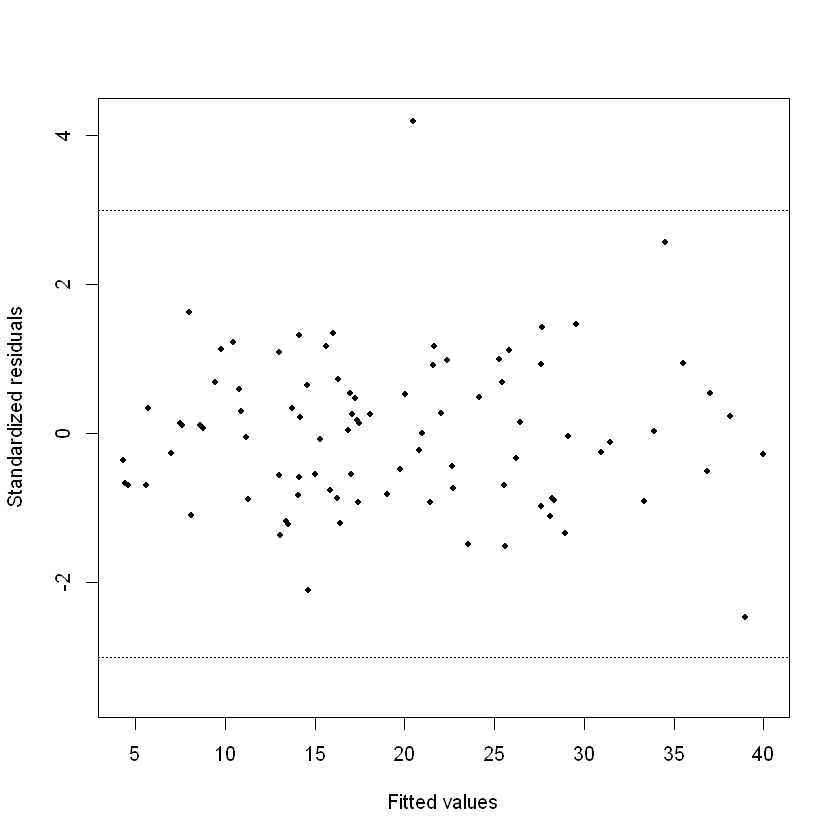

In [18]:
residuals_glm(fit2,identify=3)      #buscando los indivicuos con m?s r_k absolutos mas grandes,
                                    #verificar queien sobreestima y quien subestima

Los residuos correspondientes a las observaciones #3 y #18 son “altos”, lo que indica que el modelo ajustado subestima el número esperado de especies de plantas en la parcela #3, en la que $y_3 = 44$ y $\mu_3 = 34.54$, y en la parcela #18, en la que $y_{18} = 36$ y $\mu_{18} = 20.50$. De forma similar, los residuos correspondientes a las observaciones #1 y #20 son “bajos”, lo que indica que el modelo ajustado sobrestima el número esperado de especies de plantas en la parcela #1, en la que $y_1 = 30$ y $\mu_1 = 38.96$, y en la parcela #20, en la que $y_{20} = 7$ y $\mu_{20} = 14.63$.

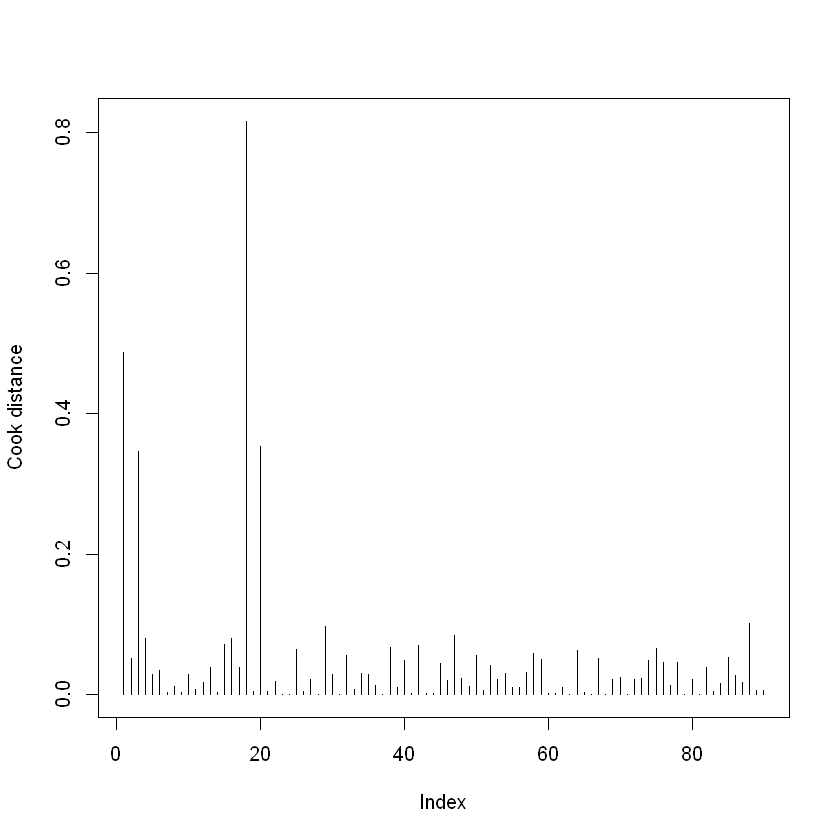

In [19]:
Cookdis_glm(fit2,identify=4)

El gráfico de la distancia de Cook destaca las observaciones #1, #3, #18 y #20. Sin embargo, la eliminación de estas observaciones del conjunto de datos no introduce cambios inferenciales puesto que *(Continúa el signo y la significancia)*

La estimación del intercepto aumentó un $1\%$, mientras que la estimación de $\beta_2$ disminuyó $3\%$ todo al quitar la observación 1. (análisis similar a las otras observaciones #3, #18 y #20)  permanece prácticamente igual lo cual indica que al quitar el dato los datos las cosas siguen siendo prácticamente iguales con respecto a la significancia.

In [20]:
case.deletion_glm(fit2,subset=-c(1))


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept)   17.6248      0.7890          0 |   17.8224      0.7691          0
Biomass       -2.7276      0.1717          0 |   -2.8165      0.1701          0
pHmid         11.9782      1.0020          0 |   12.0938      0.9727          0
pHhigh        22.6200      1.0818          0 |   23.1837      1.0723          0
            | Change(%)
(Intercept) |     1.121
Biomass     |    -3.260
pHmid       |     0.965
pHhigh      |     2.492

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


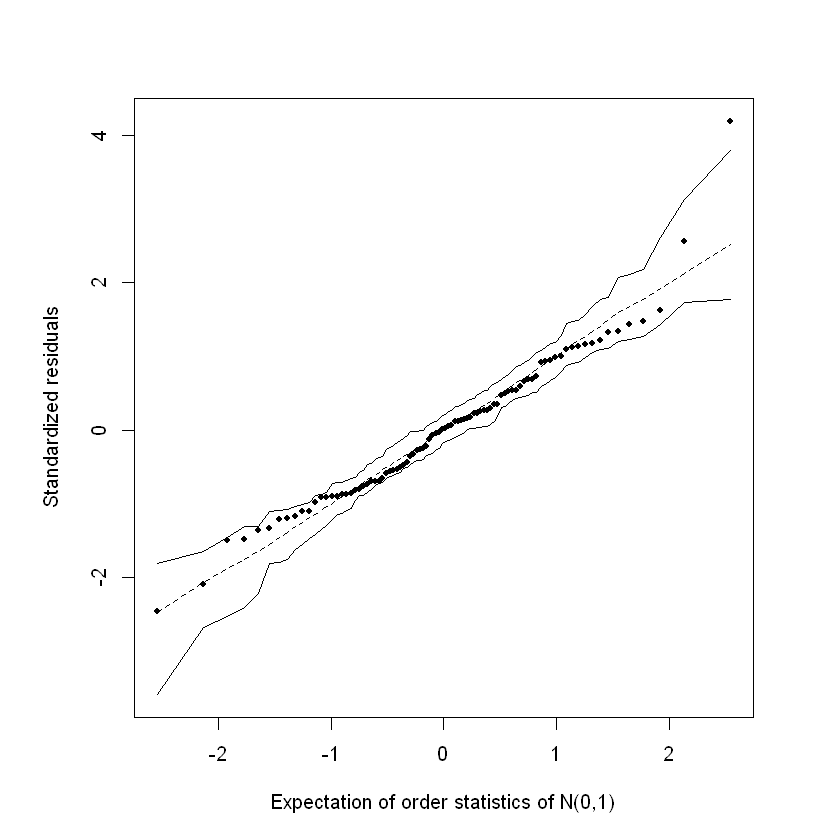

In [21]:
envelope_glm(fit2,rep=100, conf=0.95,identify=2)

La observación #18 salió de las bandas de confianza y es uno de los de **mayor residuo**

---

## Test de varianza constante


La homocedasticidad, es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo. Supongase el *modelo normal lineal heterocedastico* descrito por:

$\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta  \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma_k^2)\\
         log(\sigma_k^2) =\vartheta_1 + Z_k \vartheta 
	       \end{array}
	     \right.
   \end{equation*}
   $$
  
  
 Tengase en cuenta $\Theta_{(p+q)}$ de dimensión (p+q) donde: $\Theta= \left ( \beta ^r , \vartheta _1, \vartheta ^T \right )^T$ con $\beta$ de dimensión p, $\vartheta _1$ de dimensión 1 y $\vartheta ^T$ de dimensión q-1.
 
La forma de proceder está en contrastar la siguiente hipótesis:

$$H_{0}: \vartheta =0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta \neq  0$$
 
 
 <div class="alert alert-success">
  Si no rechazo $H_0$ entonces $H_0= \vartheta =0$ implica que  $log(\sigma_k^2) =\vartheta _1$ lo cual da indicios de que $log(\sigma_k^2)$ no depende de k lo cual acevera que existe varianza constante.
</div>

Dentro de todos los test existentes, en el modelo normal lineal los test de homogeneidad son iguales. *Sin embargo el test de Rao-Score es el mas barato de hacer*

---
#####  Test razon de verosimilutudes (para verificar homoceasticidad)

$$\zeta_{RV}=2[l( \widehat{\theta} )-l( \widehat{\theta}^{(0)} )]\;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{RV}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

*Verosimilitud del modelo completo* menos la *verosimilitud del modelo restringido*, aquí $\widehat{\theta}= {\underset{\theta \in \mathbb{R}^{p+q} }{argmax}}\;l(\theta)$

---
#####  Test razon de wald (necesita 1 parámetro a estimar $\widehat{\theta}$ )

$$\zeta_{w}=(\widehat{\vartheta} -0)^{T}[\widehat{Var}(\widehat{\vartheta})]^{-1}(\widehat{\vartheta} -0) \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{w}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

---
#####  Test de Score o Rao  (necesita 1 parámetro a estimar $\widehat{\theta}^{(0)}$ )

$$\zeta_{s}=\left \{   [U_{\vartheta}(\theta)]^{T}Var(\widehat{\vartheta})[U_{\vartheta}(\theta)]   \right \} |_{\theta=\widehat{\theta}^{(0)}}  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

Aquí $U(\theta)= \bigtriangledown l(\theta)$ es el vector gradiente y $U_{\vartheta}(\theta)$ los últimos (q-1) valores del vector gradiente.

---
#####  Test gradiente  (necesita 2 maximizaciones $\widehat{\theta}$ y $\widehat{\theta}^{(0)}$)

$$\zeta_{G}= [U_{\vartheta}(\theta)]^{T}\; \widehat{\theta}^{(0)} (\widehat{\vartheta} -0)  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

---

In [22]:
vdtest(fit2)


             Score test for varying dispersion

          Statistic =  11.07537 
 degrees of freedom =  3 
            p-value =  0.011325 



El anterior test establece que: 

$$log(\sigma_k^2) =\vartheta_1 + \vartheta_2 (Biomasa) + \vartheta_3 (PHmedio) + \vartheta_4 (PHalto) $$

Donde:

$$H_{0}: \vartheta_2 = \vartheta_3 = \vartheta_4 = 0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta_2 \neq \vartheta_3 \neq \vartheta_4 \neq 0$$

Al $5\% $ se rechaza $H_0$ envidenciandose que el modelo es heterocedastico

In [31]:
fit22 <- lm(Species ~ 1 + Biomass + pH, data=rickness2, subset=-c(18))
vdtest(fit22)
bptest(fit22,studentize=FALSE)


             Score test for varying dispersion

          Statistic =  5.29641 
 degrees of freedom =  3 
            p-value =  0.15134 



ERROR: Error in bptest(fit22, studentize = FALSE): no se pudo encontrar la función "bptest"


Quitando la observación #18 se puede observar el test de varianza constante indicandose *No hay evidencia para rechazar H_0, es decir el modelo es homocedastico* **Toda la evidencia de heterocedasticidsad presente en el modelo estaba influenciada por un solo dato, el #18**

In [34]:
#################### Intervalos de confianza para beta #################### 
ci_glm(fit2, conf=0.95)

betas <- coef(fit2)  ;betas

alpha <- 0.05
li <- betas[2] - qt(1-alpha/2,fit2$df.residual)*sqrt(diag(vcov(fit2)))[2]
ls <- betas[2] + qt(1-alpha/2,fit2$df.residual)*sqrt(diag(vcov(fit2)))[2]
c(li=li,ls=ls)


 Exact 95 percent confidence intervals

            Lower limit Upper limit
(Intercept)     16.0564     19.1933
Biomass         -3.0689     -2.3863
pHmid            9.9863     13.9701
pHhigh          20.4694     24.7706


(Intercept)     Biomass       pHmid      pHhigh 
   17.62484    -2.72758    11.97819    22.62002

li.Biomass ls.Biomass 
 -3.068853  -2.386307

# Estimación de $\mu$ para individuos que no estan en la muestra

Se realizará la estimación de tres individuos que tienen las siguientes características: 

* (Biomasa:4 y PH:Alto)
* (Biomasa:2 y PH:Medio)
* (Biomasa:1 y PH:Bajo)


In [36]:
#################### Estimaci?n de mu para individuos que no est?n en la muestra #################### 

newpar<-data.frame(Biomass=c(4,2,1),pH=c("high","mid","low"))  # 
estimaciones <- predict(fit2,newpar) ;estimaciones             # 



1        2        3 
29.33455 24.14787 14.89726

## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")


---
Algunas de las bases de datos están en el siguiente enlace: 

* http://users.stat.ufl.edu/~aa/glm/data/